<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/PracticaFinal_py_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib

In [2]:
pip install plotly_express

In [3]:
# Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [6]:
# Lectura de la base de datos
filename = 'Datos_practica_final_python.csv'
data = pd.read_csv(filename, sep = ',')


# Eliminar la columnas que no sirven para el ejercicio
data = data.drop(['UNIT'], axis=1)

(40612, 12)


<ipython-input-6-3313b674d83a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)


,MU,BU,SECTOR,COUNTRY,SUBBRAND,YEAR,PERIOD,SCENARIO,AMOUNT,MONTH,FORECAST_YEAR,FORECAST
0,GC Bev,GC Bev,APAC,China,7up (L3),2023,4,AI_forecast,1.957937e+06,3,2022.0,AI_P07F
1,India Bev,India,AMESA,India,Pepsi Regular (L3),2023,9,AI_forecast,9.390326e+06,8,2022.0,AI_P07F
2,India Bev,India,AMESA,India,Pepsi Regular (L3),2022,9,AI_forecast,6.865113e+06,8,2022.0,AI_P08F
3,GC Bev,GC Bev,APAC,China,7up (L3),2024,3,AI_forecast,2.133347e+06,2,2022.0,AI_P12F
4,Mexico,LAB Mexico,LATAM,Mexico,7up Free (L3),2023,6,AI_forecast,3.493313e+06,5,2022.0,AI_P12F
5,ANZ Bev,ANZ,APAC,Australia,Diet Pepsi (L3),2023,3,AI_forecast,2.631914e+04,2,2022.0,AI_P05F
6,Spain,SWE,Europe,Spain,Aquarade By Radical (L3),2024,5,AI_forecast,9.268166e+02,4,2022.0,AI_P12F
7,GBI FOBO,FOBO BU,Europe,Great Britain,7up (L3),2023,5,AI_forecast,1.241093e+05,4,2022.0,AI_P11F
8,Mexico,LAB Mexico,LATAM,Mexico,Pepsi Max (L3),2023,2,AI_forecast,8.653957e+05,1,2022.0,AI_PF
9,NE FOBO,FOBO BU,Europe,Sweden,7up (L3),2022,8,AI_forecast,7.843683e+04,7,2022.0,AI_PF


Analizamos los datos para ver cuántos distintos hay y cuál es su distribución hay por campo.

In [18]:
print(data['SCENARIO'].value_counts())
print('')
print(data['MU'].value_counts())
print('')
print(data['COUNTRY'].value_counts())
print('')
print(data['SECTOR'].value_counts())
print('')
print(data['FORECAST'].value_counts())
print('')
print(data['SUBBRAND'].value_counts())
print('')

AI_forecast    31704
actual          8908
Name: SCENARIO, dtype: int64

GBI FOBO        4538
India Bev       4518
Mexico          4182
Gulf Bev CU     4076
GC Bev          3927
Spain           3616
Pakistan Bev    3322
Chile           3158
North Asia      2728
ANZ Bev         2595
Colombia        2242
NE FOBO         1710
Name: MU, dtype: int64

Great Britain         4538
India                 4518
Mexico                4182
UnitedArabEmirates    4076
China                 3927
Spain                 3616
Pakistan              3322
Chile                 3158
South Korea           2728
Australia             2595
Colombia              2242
Sweden                1710
Name: COUNTRY, dtype: int64

AMESA     11916
Europe     9864
LATAM      9582
APAC       9250
Name: SECTOR, dtype: int64

AI_P07F    2628
AI_P08F    2628
AI_P12F    2628
AI_P05F    2628
AI_P11F    2628
AI_PF      2628
AI_P03F    2628
AI_P06F    2628
AI_P09F    2628
AI_P10F    2628
AI_P02F    2628
AI_P04F    2628
AI_AOP      168

Observamos que están bastante uniformemente distribuidos, en cada campo.

Procedo a eliminar aquellos registros con volúmenes negativos puesto que no tienen sentido.

In [19]:
# Cogemos solo los registros con volumen real positivo
data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)

# Aquellos registros predichos cuyo valor del volumen es menor que 0, los convierto en 0.
data.loc[data['AMOUNT'] < 0, 'AMOUNT'] = 0

# Revisión de los datos
print(data.shape)
data.head(10)

(40612, 12)


<ipython-input-19-ef756ff6f0da>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)


,MU,BU,SECTOR,COUNTRY,SUBBRAND,YEAR,PERIOD,SCENARIO,AMOUNT,MONTH,FORECAST_YEAR,FORECAST
0,GC Bev,GC Bev,APAC,China,7up (L3),2023,4,AI_forecast,1.957937e+06,3,2022.0,AI_P07F
1,India Bev,India,AMESA,India,Pepsi Regular (L3),2023,9,AI_forecast,9.390326e+06,8,2022.0,AI_P07F
2,India Bev,India,AMESA,India,Pepsi Regular (L3),2022,9,AI_forecast,6.865113e+06,8,2022.0,AI_P08F
3,GC Bev,GC Bev,APAC,China,7up (L3),2024,3,AI_forecast,2.133347e+06,2,2022.0,AI_P12F
4,Mexico,LAB Mexico,LATAM,Mexico,7up Free (L3),2023,6,AI_forecast,3.493313e+06,5,2022.0,AI_P12F
5,ANZ Bev,ANZ,APAC,Australia,Diet Pepsi (L3),2023,3,AI_forecast,2.631914e+04,2,2022.0,AI_P05F
6,Spain,SWE,Europe,Spain,Aquarade By Radical (L3),2024,5,AI_forecast,9.268166e+02,4,2022.0,AI_P12F
7,GBI FOBO,FOBO BU,Europe,Great Britain,7up (L3),2023,5,AI_forecast,1.241093e+05,4,2022.0,AI_P11F
8,Mexico,LAB Mexico,LATAM,Mexico,Pepsi Max (L3),2023,2,AI_forecast,8.653957e+05,1,2022.0,AI_PF
9,NE FOBO,FOBO BU,Europe,Sweden,7up (L3),2022,8,AI_forecast,7.843683e+04,7,2022.0,AI_PF


# Pregunta 1
#### Clasifica cada uno de los campos en uno de los siguientes cuatro grupos: campos que indican información de la granularidad, campos que indican información temporal, campos que indican información acerca del propio valor del registro y campo que nos indique si el registro es un valor real o una predicción. Ordena la tabla para que los campos de cada grupo estén juntos.

-----------------------------
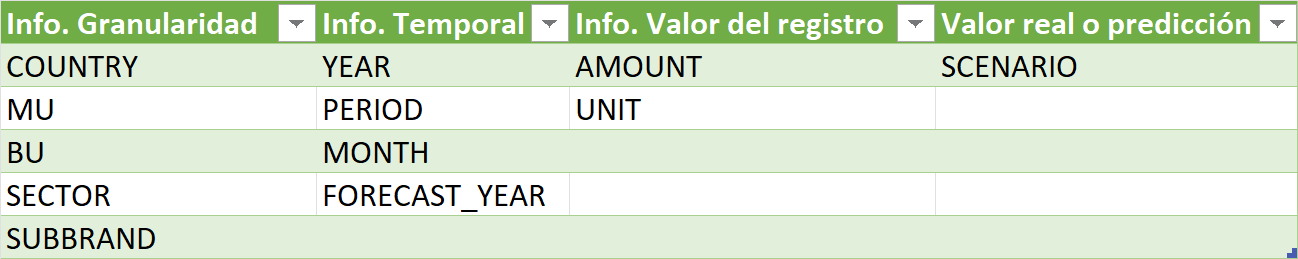

Dentro de la información del propio valor del registro he metido las unidades (UNITS), ya que aunque en este caso concreto no aporten información extra porque siempre tienen el valor 8OZ, es importante conocer qué unidades tiene el valor del registro para operar con dicho valor en caso de ser necesario.

Por ejemplo, no se pueden comparar registros de 1 kg con registros de 1 mg (en caso de estar hablado de pesos).

# Pregunta 2

#### Con relación a los valore reales (no predicciones). ¿Cuál es el volumen total de cada uno de los sectores, cual es el sector con más volumen y cuál es el país con más volumen dentro del sector con más volumen?

In [21]:
condition = data['SCENARIO'] == 'actual'
data_real = data[condition]


data_real_cust = data_real.groupby(['SECTOR'])['AMOUNT'].sum().reset_index()

# Observo los 4 diferentes clientes que hay
unique_values = data_real_cust['SECTOR'].unique()
unique_values

array(['AMESA', 'APAC', 'Europe', 'LATAM'], dtype=object)

Primero veremos cada sector por separado y posteriormente una gráfica de barras donde estén los 4 sectores para poder visualizar con claridad cuál de todos los sectores tiene más volumen.



In [24]:
for value in unique_values:
    sector_amount = data_real_cust[data_real_cust['SECTOR'] == value]
    sector_amount = sector_amount.sort_values(by='AMOUNT', ascending=False)[0:4]

    # Gráfica
    px.bar(sector_amount, x = 'AMOUNT', y = 'SECTOR', text_auto='.2s',
           title='Volumen sector: ' + str(value)).show()

In [25]:
# Sort the DataFrame by 'AMOUNT' in descending order
data_real_cust_sorted = data_real_cust.sort_values(by='AMOUNT', ascending=False)

# Plot a bar chart
fig = px.bar(data_real_cust_sorted, x='AMOUNT', y='SECTOR',
             text='AMOUNT', orientation='h',
             title='Total Amount by Sector')
fig.show()

Observamos que el sector con mayor volumen es el sector 'APAC', seguido de 'AMESA'. El resto de sectores tienen un volumen considerablemente inferior.

Como sabemos que el sector con más volumen es 'APAC', vamos a considerar solo los registros reales que pertenecen a este sector y agrupando por país, veremos cuál es el país con más volumen.

In [32]:
data_real_APAC = data_real.loc[data_real['SECTOR'] == 'APAC']

data_real_APAC_cust = data_real_APAC.groupby(['COUNTRY'])['AMOUNT'].sum().reset_index()

COUNTRY      AMOUNT      
Australia    4.444429e+08    1
China        5.567806e+09    1
South Korea  5.347530e+08    1
dtype: int64

In [35]:
# Sort the DataFrame by 'AMOUNT' in descending order
data_real_cust_sorted = data_real_APAC_cust.sort_values(by='AMOUNT', ascending=False)

# Plot a bar chart
fig = px.bar(data_real_cust_sorted, x='AMOUNT', y='COUNTRY',
             text='AMOUNT', orientation='h',
             title='Total Amount by Country from Sector: APAC')
fig.show()

if len(data_real_APAC.value_counts()) <= 5:
  # Plot a pie chart
  fig = px.pie(data_real_cust_sorted, values='AMOUNT', names='COUNTRY',
              title='Total Amount by Country in Sector: APAC')
  fig.show()


Se va claramente que el país con más volumen dentro del Sector con más volumen (APAC) es China. Al contener solo 3 países distintos, visualizamos también un pie chart que nos muestra la diferencia porcentual, este devuelve que China tiene el 85% de la cantidad de volumen de todos los países (3) pertenecientes al sector 'APAC'.

# Pregunta 3
#### ¿Cuáles son las predicciones hechas para el país con más volumen del sector con más volumen (el país de la pregunta anterior) en los periodos 2 y 3 del año 2022? Atención: Hechas en los periodos 2 y 3 significa que se hicieron en ese momento del tiempo, pero al tener un horizonte de previsión de 18 periodos se habrán hecho para varios periodos futuros en ese momento. A simple vista, ¿Cuál de las previsiones te parece mejor, sabiendo ahora los datos reales que hubo posteriormente?

In [43]:
data_2022 = data.loc[data['FORECAST_YEAR'] == 2022]
data_2_3_2022 = data_2022.loc[(data_2022['FORECAST'] == 'AI_P02F') | (data['FORECAST'] == 'AI_P03F')]

# data['FORECAST'].value_counts()
data_2_3_2022['FORECAST'].value_counts()

AI_P03F    2628
AI_P02F    2628
Name: FORECAST, dtype: int64